In [249]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

In [199]:
data = pd.read_csv("danoDatabase/danoClearData.csv", delimiter=',')

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74984 entries, 0 to 74983
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   record_id                  74984 non-null  int64 
 1   athlete_id                 74984 non-null  int64 
 2   event_name                 74984 non-null  object
 3   event_date                 74984 non-null  object
 4   n_runners                  74984 non-null  int64 
 5   finish_time                74984 non-null  int64 
 6   position                   74984 non-null  int64 
 7   athlete_gender             74984 non-null  object
 8   athlete_age                74984 non-null  int64 
 9   best_time                  74984 non-null  int64 
 10  worst_time                 74984 non-null  int64 
 11  mean_time                  74984 non-null  object
 12  median_time                74984 non-null  object
 13  times                      74984 non-null  int64 
 14  num_lo

In [201]:
data

,record_id,athlete_id,event_name,event_date,n_runners,finish_time,position,athlete_gender,athlete_age,best_time,...,humidity,dew_point,clouds,wind_speed,wind_deg,weather.main,weather.description,rain.1h,snow.1h,track_description_surface
0,6490,790055465,Нижний пруд,25.3.2023,22,1260,1,мужской,43,1260,...,90,"6,36",25,"3,67",223,Rain,light rain,"0,1",NaN,"асфальт, бетон"
1,7459,790055465,Нижний пруд,6.5.2023,32,1098,3,мужской,43,1098,...,54,"-1,63",95,"4,18",83,Clouds,overcast clouds,NaN,NaN,"асфальт, бетон"
2,10674,790055465,Нижний пруд,9.9.2023,35,1138,1,мужской,44,1098,...,85,"15,06",100,"0,8",155,Clouds,overcast clouds,NaN,NaN,"асфальт, бетон"
3,13267,790055465,Нижний пруд,9.12.2023,25,1420,8,мужской,44,1098,...,95,"-5,17",100,"3,47",140,Clouds,overcast clouds,NaN,NaN,"асфальт, бетон"
4,6755,790055533,Бутово,8.4.2023,69,1222,6,мужской,35,1222,...,52,"-3,17",0,3,110,Clear,clear sky,NaN,NaN,смешанное
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74979,12687,790165194,Воронеж Центральный парк,18.11.2023,35,1775,33,мужской,35,1775,...,86,"-4,83",75,3,40,Clouds,broken clouds,NaN,NaN,смешанное
74980,12934,790165194,Воронеж Центральный парк,25.11.2023,32,1726,24,мужской,35,1726,...,86,"-0,57",75,4,230,Clouds,broken clouds,NaN,NaN,смешанное
74981,13265,790165194,Солнечный остров,9.12.2023,35,1781,20,мужской,35,1726,...,75,"1,63",0,6,90,Clear,clear sky,NaN,NaN,твердое
74982,13577,790165194,Воронеж Центральный парк,23.12.2023,22,1996,22,мужской,35,1726,...,100,"2,56",100,4,140,Mist,mist,"0,26",NaN,смешанное


In [202]:
data['event_name'].value_counts()

event_name
Затюменский                  5999
Магнитогорск Экопарк         2818
Солнечный остров             1539
Пестовский                   1529
Ростов-на-Дону               1448
                             ... 
Петрозаводск Ямка              85
Электросталь Авангард          35
Котельники Кузьминский         23
Кольчугино Городской парк      22
Стрелка                         6
Name: count, Length: 129, dtype: int64

In [203]:
import matplotlib.pyplot as plt

C:\Users\mazh0\AppData\Local\Temp\ipykernel_4208\2876058146.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


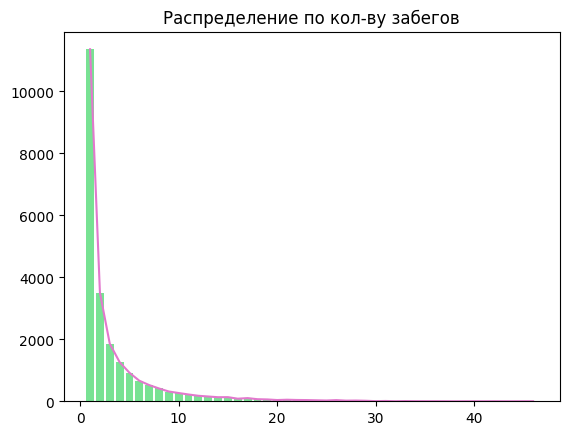

In [204]:
id_ageloh = data[['athlete_id', 'times']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]
times = id_ageloh['times'].to_list()
num = []
amount= []
for i in range(1, 47):
    num.append(i)
for i in range(1, 47):
    amount.append(times.count(i))
plt.bar(x=num, height=amount, color='#78E293')
plt.plot(num, amount, color='#E278CD')
plt.title('Распределение по кол-ву забегов')
plt.show()

([<matplotlib.patches.Wedge at 0x222175b53a0>,
 [Text(-0.1920688267632362, 1.0831018261390728, 'мужской'),
  Text(0.19206892817054672, -1.0831018081562866, 'женский')])

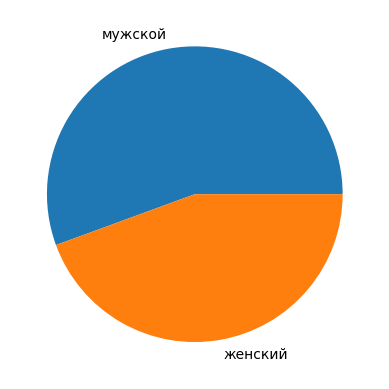

In [205]:
id_age = data[['athlete_id', 'athlete_gender', 'athlete_age']]
id_age = id_age[~data.athlete_id.duplicated(keep='first')]
man = len(list(id_age['athlete_gender'][id_age['athlete_gender'] == 'мужской']))
fem = len(list(id_age['athlete_gender'][id_age['athlete_gender'] == 'женский']))
sex = ['мужской', 'женский']
num = [man, fem]
plt.pie(num, labels=sex)

<BarContainer object of 122 artists>

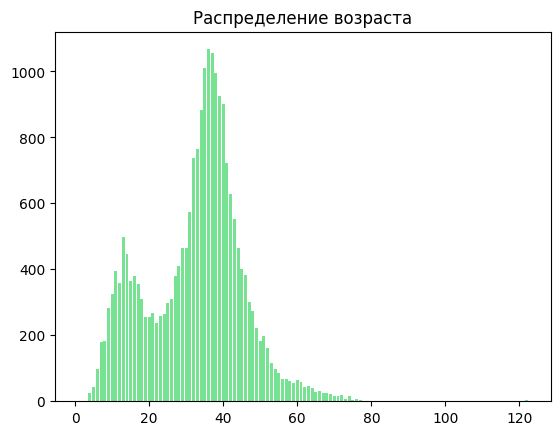

In [206]:
id_age = data[['athlete_id', 'athlete_age']]
id_age = id_age[~data.athlete_id.duplicated(keep='first')]
a = id_age['athlete_age'].to_list()
num = []
amount = []
for i in range(1, 123):
    num.append(i)
for i in range(1, 123):
    amount.append(a.count(i))
plt.title('Распределение возраста')
plt.bar(num,height=amount, color='#78E293')


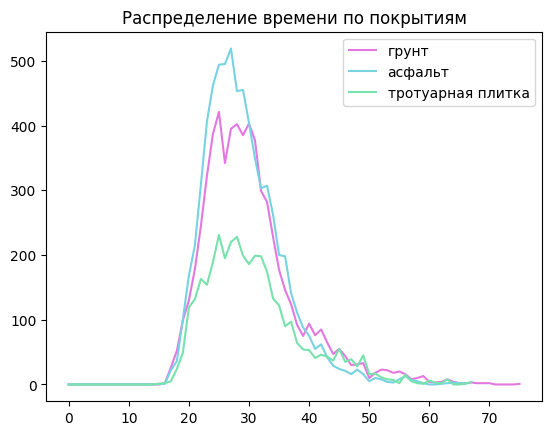

In [207]:
from collections import OrderedDict

data['track_description_surface'].value_counts()
id_data = data[['track_description_surface', 'finish_time']]
id_data = id_data.sort_values(by=['finish_time'], kind='quicksort', ascending=False)
# id_data = id_data[~data.track_description_surface.duplicated(keep='first')]

surfaces = set(data['track_description_surface'].to_list())

batch_k = 60

cnt_times_nozero = dict()
cnt_times = dict()

for surface in surfaces:
    temp = id_data[id_data['track_description_surface'] == surface].copy()
    temp['batch_time'] = temp['finish_time'] // batch_k
    batches = temp['batch_time'].to_list()
    rm_batches = sorted(batches)[:-1:]
    cnt_times[surface] = [batches.count(timeb) for timeb in range(0, max(rm_batches) + 1)]
    cnt_times_nozero[surface] = [batches.count(batch) for batch in list(OrderedDict.fromkeys(batches))]


cnt_times["твердое"]
cnt_times["асфальт"]
cnt_times["смешанное"]
plt.plot(cnt_times["грунт"], color='#E278E0')
plt.plot(cnt_times["асфальт"], color='#78D2E2')
plt.plot(cnt_times["тротуарная плитка"], color='#78E2AC') 
plt.title('Распределение времени по покрытиям')
plt.legend(('грунт', 'асфальт', 'тротуарная плитка'))
plt.show()

In [221]:

id_ageloh = data[['athlete_id', 'num_locations', 'times', 'median_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]
X = []
Y = []
for el in list(id_ageloh['median_time']):
    Y.append(float(str(el).replace(',', '.')))
for i in range(len(list(id_ageloh['athlete_id']))):
    X.append(list(id_ageloh['num_locations'])[i]/list(id_ageloh['times'])[i])
list(id_ageloh['num_locations'])[1]

C:\Users\mazh0\AppData\Local\Temp\ipykernel_4208\980704594.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


4

In [222]:
X = [X[i:i + 1] for i in range(0, len(X))]
X = np.array(X)
y = np.array(Y)

model = LinearRegression()
model.fit(X, Y)

# Получаем коэффициенты
coeff = model.coef_[0]
intercept = model.intercept_

# Предсказания и остатки
predictions = model.predict(X)
residuals = Y - predictions

# Стандартная ошибка
n = len(Y)
std_err = np.sqrt(np.sum(residuals**2) / (n - 2))

# Стандартная ошибка для коэффициента
X_mean = np.mean(X)
std_err_coeff = std_err / np.sqrt(np.sum((X - X_mean)**2))

# t-статистика
t_stat = coeff / std_err_coeff

# p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

print(f'Коэффициент: {coeff}, t-статистика: {t_stat}, p-value: {p_value}')

Коэффициент: 184.42601615332103, t-статистика: 15.55414862535283, p-value: 0.0


In [248]:
id_ageloh = data[['athlete_id', 'num_locations', 'times', 'median_time']]
id_ageloh = id_ageloh.sort_values(by=['times'], kind='quicksor', ascending=False)
id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]
id_ageloh = id_ageloh.sort_values(by=['median_time'], kind='quicksort', ascending=True)
print(id_ageloh['median_time'])
# id_ageloh = id_ageloh[id_ageloh['median_time'] != id_ageloh['median_time'].max()]


1701       1005
58508      1014
238        1015
68442      1015
31296    1016,5
          ...  
1105        989
21569       990
7429        991
30545       992
55664       995
Name: median_time, Length: 22563, dtype: object


C:\Users\mazh0\AppData\Local\Temp\ipykernel_4208\3320627887.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_ageloh = id_ageloh[~data.athlete_id.duplicated(keep='last')]


Text(0, 0.5, 'Значения по оси Y')

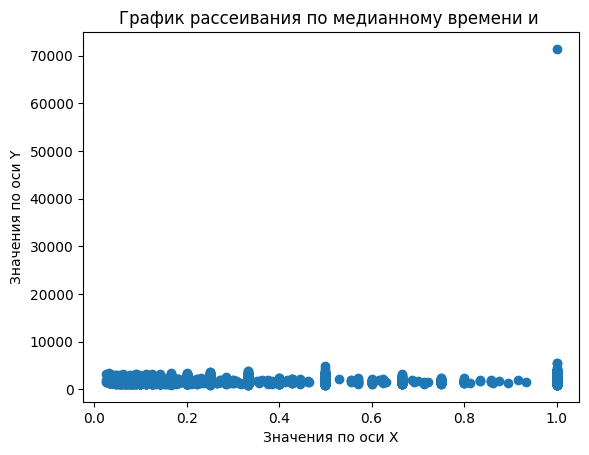

In [247]:
X1 = []
Y1 = []
for el in list(id_ageloh['median_time']):
    Y1.append(float(str(el).replace(',', '.')))
for i in range(len(list(id_ageloh['athlete_id']))):
    X1.append(list(id_ageloh['num_locations'])[i]/list(id_ageloh['times'])[i])
plt.scatter(X1, Y1)
plt.title('График рассеивания по медианному времени и ')
plt.xlabel('Значения по оси X')
plt.ylabel('Значения по оси Y')